## PROYECTO INDIVIDUAL Nº2

### carga de librerias para realizar el proseso ETL

In [2]:
import pandas as pd
import numpy as np


#### Carga de los Datos CSV
Se utilizará la función `pandas.read_csv()` para leer el archivo *csv*.

In [3]:
df_general=pd.read_csv("AccidentesAviones.csv",sep=",")


#### Realizando una copia a la data original

In [4]:
df_copia=df_general.copy()

hora se necesita reemplazar los signos de interrogación **?** con **NaN** así el método `dropna()` puede remover los valores perdidos.
#### Convertir "?" a NaN</h4>
En el conjunto de datos de los Accidentes aéreos, los datos que no están presentes o faltan están marcados con un signo de interrogación **?**. El objetivo ahora es reemplazar los **?** con **NaN**. Este es al valor por defectos que tiene *Python* para marcar los valores que faltan por razones de velocidad computacional y conveniencia. Para realizar esto hay que utilizar la función: `replace()'.

In [5]:
df_copia=df_copia.replace('?',np.NaN)
df_copia["flight_no"]=df_copia["flight_no"].replace('-',np.NaN)


Eliminando la columna Unnamed, por que es innecesario tener esa columna en la data set

In [6]:
df_copia.drop(columns=["Unnamed: 0"], axis=1,inplace=True)
df_copia.drop(columns=["HORA declarada"], axis=1,inplace=True)

La fechas, deberán tener el formato AAAA-mm-dd aplicamos  ***to_datetime()*** 

In [7]:
df_copia["fecha"]=pd.to_datetime(df_copia["fecha"])

Cambiando los nombres de las columnas del data set Accidentes Aério

In [8]:
df_copia.rename(columns={
                 "Ruta":"ubicasion_accidente","OperadOR":"operador",
                 "flight_no":"numero_vuelo","route":"ruta_de_vuelo",
                 "ac_type":"tipo_ac","registration":"registro",
                 "all_aboard":"todos_abordo","PASAJEROS A BORDO":"pasajero_abordo",
                 "crew_aboard":"tripulacion_abordo","cantidad de fallecidos":"cantidad_fallecidos",
                 "passenger_fatalities":"pasajero_muerto","crew_fatalities":"fatalidad_dela_tripulacion",
                 "ground":"suelo","summary":"resumen"},inplace=True)

#### Separamos la columna ubicasion_accidente en la columnas  pais

In [9]:
df_copia.ubicasion_accidente=df_copia.ubicasion_accidente.str.strip()
df_copia['pais']  = df_copia['ubicasion_accidente'].str.split(',').str[-1]

#### Información básica de los conjuntos de datos

Después de leer los datos en un dataframe **Pandas**, es tiempo de explorar el conjunto de datos.

In [10]:
#mostramos la informacion de la data, donde tiene un total de 5008 filas, 17 columnas, la cantidad de columnas no nulas y el tipo de datos que contiene
#cada columna
df_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   fecha                       5008 non-null   datetime64[ns]
 1   ubicasion_accidente         5003 non-null   object        
 2   operador                    4998 non-null   object        
 3   numero_vuelo                1290 non-null   object        
 4   ruta_de_vuelo               4246 non-null   object        
 5   tipo_ac                     4995 non-null   object        
 6   registro                    4736 non-null   object        
 7   cn_ln                       4341 non-null   object        
 8   todos_abordo                4991 non-null   object        
 9   pasajero_abordo             4787 non-null   object        
 10  tripulacion_abordo          4789 non-null   object        
 11  cantidad_fallecidos         5000 non-null   object      

### Analisis de Nulos

In [11]:
df_copia.isna().sum().sort_values(ascending = False)

numero_vuelo                  3718
ruta_de_vuelo                  762
cn_ln                          667
registro                       272
fatalidad_dela_tripulacion     235
pasajero_muerto                235
pasajero_abordo                221
tripulacion_abordo             219
resumen                         59
suelo                           44
todos_abordo                    17
tipo_ac                         13
operador                        10
cantidad_fallecidos              8
ubicasion_accidente              5
pais                             5
fecha                            0
dtype: int64

#### tomamos la decision de eliminar  numero de vuelo por que tiene demaciado datos faltantes y la columna cn_ln

In [12]:
df_copia.drop(columns=["numero_vuelo"],inplace=True,axis=1)
df_copia.drop(columns=["cn_ln"],inplace=True,axis=1)

#### remplazando algunas columnas con sin dato o dato desconicido

In [108]:
df_copia["pais"]=df_copia["pais"].replace(np.NaN,"unknown data")
df_copia["ubicasion_accidente"]=df_copia["ubicasion_accidente"].replace(np.NaN,"unknown data")
df_copia["resumen"]=df_copia["resumen"].replace(np.NaN,"unknown data")
df_copia["operador"]=df_copia["operador"].replace(np.NaN,"unknown data")
df_copia["tipo_ac"]=df_copia["tipo_ac"].replace(np.NaN,"unknown data")


In [14]:
df_copia.isna().sum().sort_values(ascending = False)

ruta_de_vuelo                 762
registro                      272
fatalidad_dela_tripulacion    235
pasajero_muerto               235
pasajero_abordo               221
tripulacion_abordo            219
suelo                          44
todos_abordo                   17
tipo_ac                        13
cantidad_fallecidos             8
pais                            0
resumen                         0
operador                        0
ubicasion_accidente             0
fecha                           0
dtype: int64

## EDA ( Análisis exploratorio de datos)

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()

calculando el prodedio de fallecidos 

In [114]:
promedio_cantidad_fallecidos=df_copia["cantidad_fallecidos"].astype("float").mean(axis=0)
df_copia.dropna(subset=["cantidad_fallecidos"],inplace=True,axis=0)
df_copia.dropna(subset=["registro"],inplace=True,axis=0)
df_copia.dropna(subset=["ruta_de_vuelo"],inplace=True,axis=0)
df_copia[["cantidad_fallecidos"]] = df_copia[["cantidad_fallecidos"]].astype("int")
print("cantidad_fallecidos:", promedio_cantidad_fallecidos)

cantidad_fallecidos: 22.73477879982479


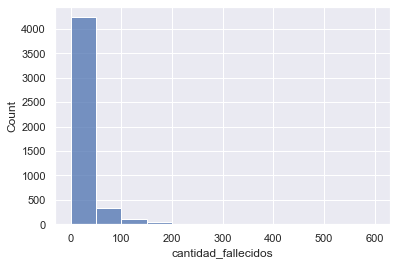

In [84]:
sns.histplot(data=df_copia, x="cantidad_fallecidos", binwidth=50, bins=10)
plt.show()

In [76]:
promedio_cantidad_fallecidos=df_copia["pasajero_muerto"].astype("float").mean(axis=0)
df_copia.dropna(subset=["pasajero_muerto"],inplace=True,axis=0)
df_copia[["pasajero_muerto"]] = df_copia[["pasajero_muerto"]].astype("int")
print("pasajero_muerto:", promedio_cantidad_fallecidos)

pasajero_muerto: 18.940708150010476


In [94]:
promedio_cantidad_fallecidos=df_copia["pasajero_abordo"].astype("float").mean(axis=0)
df_copia.dropna(subset=["pasajero_abordo"],inplace=True,axis=0)
df_copia[["pasajero_abordo"]] = df_copia[["pasajero_abordo"]].astype("int")

promedio_cantidad_fallecidos=df_copia["todos_abordo"].astype("float").mean(axis=0)
df_copia.dropna(subset=["todos_abordo"],inplace=True,axis=0)
df_copia[["todos_abordo"]] = df_copia[["todos_abordo"]].astype("int")
print("todos abordo:", promedio_cantidad_fallecidos)

todos abordo: 31.36495278069255


In [97]:
promedio_cantidad_fallecidos=df_copia["tripulacion_abordo"].astype("float").mean(axis=0)
df_copia.dropna(subset=["tripulacion_abordo"],inplace=True,axis=0)
df_copia[["tripulacion_abordo"]] = df_copia[["tripulacion_abordo"]].astype("int")
print("promedio de tripulacion_abordo:", promedio_cantidad_fallecidos)

promedio_cantidad_fallecidos=df_copia["fatalidad_dela_tripulacion"].astype("float").mean(axis=0)
df_copia.dropna(subset=["fatalidad_dela_tripulacion"],inplace=True,axis=0)
df_copia[["fatalidad_dela_tripulacion"]] = df_copia[["fatalidad_dela_tripulacion"]].astype("int")
print("promedio de fatalidad_dela_tripulacion:", promedio_cantidad_fallecidos)

promedio de tripulacion_abordo: 4.517204982056153
promedio de fatalidad_dela_tripulacion: 3.5860249102807686


In [96]:
promedio_cantidad_fallecidos=df_copia["suelo"].astype("float").mean(axis=0)
df_copia.dropna(subset=["suelo"],inplace=True,axis=0)
df_copia[["suelo"]] = df_copia[["suelo"]].astype("int")
print("promedio de accidente en el suelo:", promedio_cantidad_fallecidos)

promedio de accidente en el suelo: 1.7692632467806628


cantidad fallecida en el accidente aério con respecto a la fataliadad del tripulante en el accidente 

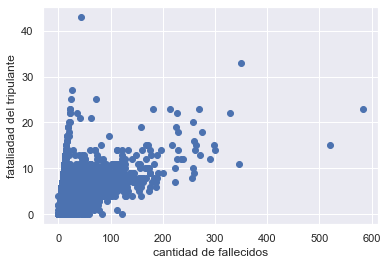

In [99]:
plt.scatter(df_copia["cantidad_fallecidos"], df_copia["fatalidad_dela_tripulacion"])
plt.xlabel("cantidad de fallecidos")
plt.ylabel("fataliadad del tripulante")
plt.show()

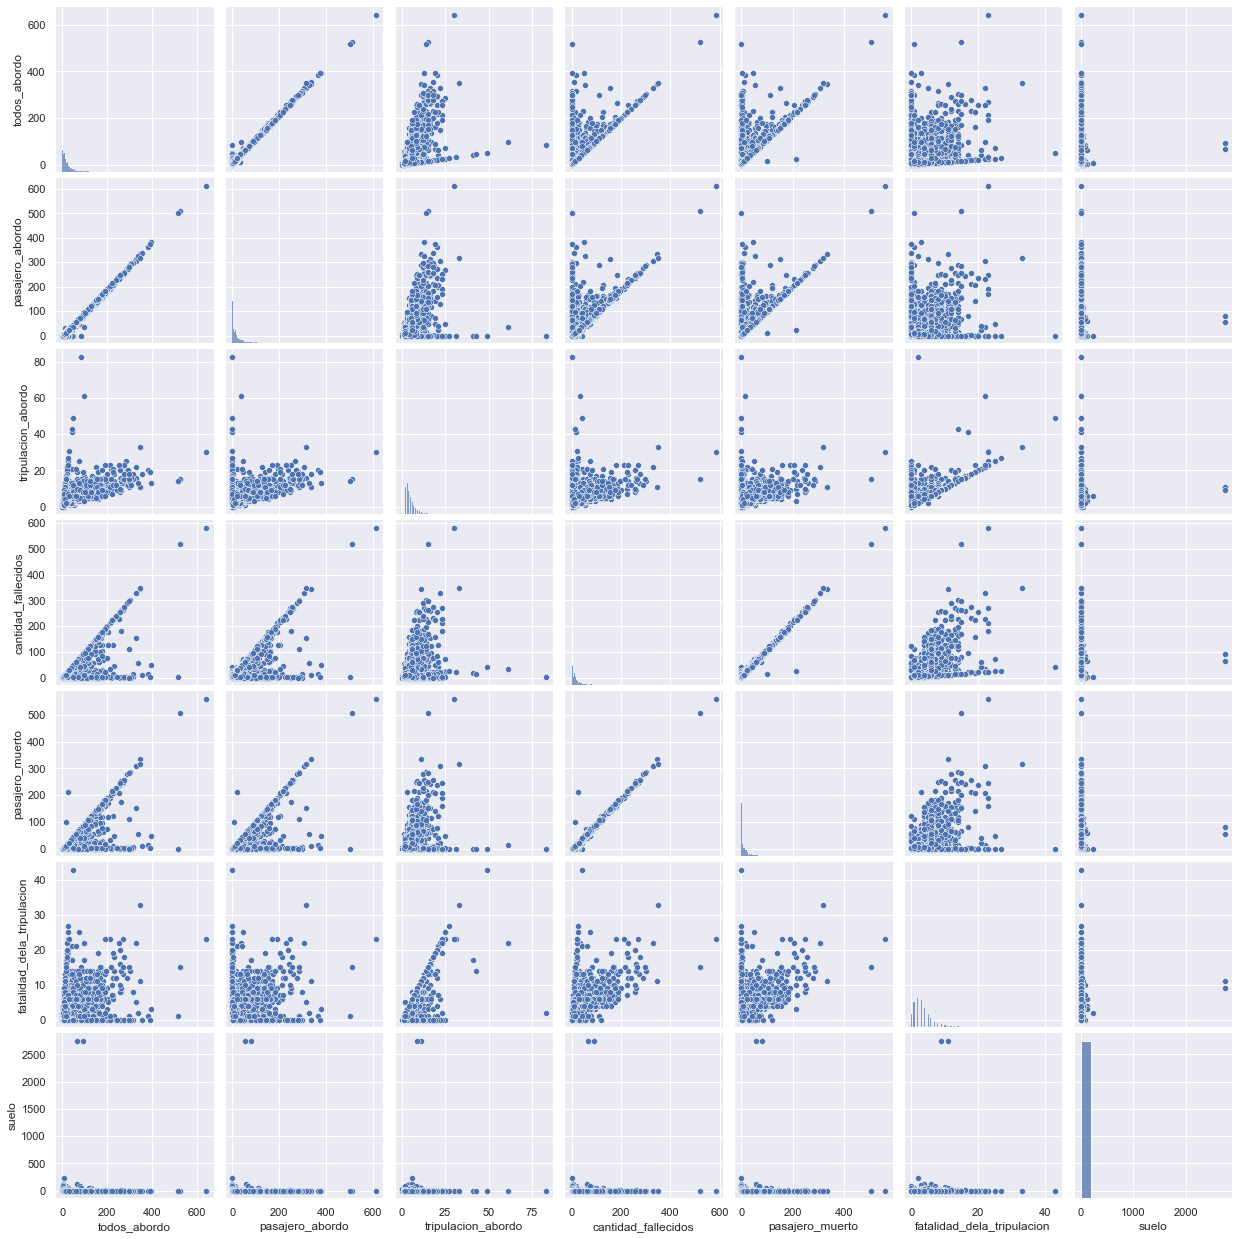

In [100]:
sns.pairplot(df_copia)

In [101]:
corr = df_copia.corr()
corr.style.background_gradient(cmap="coolwarm")

,todos_abordo,pasajero_abordo,tripulacion_abordo,cantidad_fallecidos,pasajero_muerto,fatalidad_dela_tripulacion,suelo
todos_abordo,1.000000,0.997513,0.571246,0.742671,0.746845,0.322476,0.020633
pasajero_abordo,0.997513,1.000000,0.512753,0.738986,0.747333,0.276046,0.018845
tripulacion_abordo,0.571246,0.512753,1.000000,0.443346,0.396949,0.718612,0.032160
cantidad_fallecidos,0.742671,0.738986,0.443346,1.000000,0.993001,0.575563,0.032683
pasajero_muerto,0.746845,0.747333,0.396949,0.993001,1.000000,0.509818,0.030121
fatalidad_dela_tripulacion,0.322476,0.276046,0.718612,0.575563,0.509818,1.000000,0.043931
suelo,0.020633,0.018845,0.032160,0.032683,0.030121,0.043931,1.000000


In [155]:
df_copia.to_csv("AccidenteAério.csv",index=False)